In [64]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np

In [65]:
imported_data = []
boroughs = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Statenisland",
}

for i in range(1, 6):
    imported_data.append(
        pd.read_excel(f"./datasets/rollingsales_{boroughs[i].lower()}.xlsx")
    )

rollingsales_df = pd.concat(imported_data, ignore_index=True)
rollingsales_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,372,36,NaN,S2,19 AVENUE D,NaN,...,2.0,1.0,3.0,826.0,2481.0,1900.0,1,S2,1,2023-01-20
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,390,50,NaN,C1,"209 EAST 7TH STREET, 3E",NaN,...,29.0,0.0,29.0,3900.0,18099.0,1900.0,2,C1,154196,2023-09-15
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,390,50,NaN,C1,"209 EAST 7TH STREET, 4E",NaN,...,29.0,0.0,29.0,3900.0,18099.0,1900.0,2,C1,154196,2023-09-15
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,60,NaN,C2,191 EAST 7TH STREET,NaN,...,5.0,0.0,5.0,1080.0,3328.0,1910.0,2,C2,2725000,2023-08-10
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,396,4,NaN,C4,221 AVENUE B,NaN,...,8.0,1.0,9.0,1936.0,5538.0,1904.0,2,C4,10,2023-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73157,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,84,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2603.0,0.0,2022.0,1,V0,1116638,2022-12-19
73158,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,6970,85,NaN,A1,N/A LENEVAR AVENUE,NaN,...,1.0,0.0,1.0,2551.0,0.0,NaN,1,V0,1116638,2022-12-19
73159,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,86,NaN,V0,N/A LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2597.0,0.0,2023.0,1,V0,1116638,2022-12-19
73160,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,6970,87,NaN,V0,96 LENEVAR AVENUE,NaN,...,0.0,0.0,0.0,2644.0,0.0,2023.0,1,V0,1116638,2022-12-19


In [66]:
rollingsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73162 entries, 0 to 73161
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73162 non-null  int64         
 1   NEIGHBORHOOD                    73162 non-null  object        
 2   BUILDING CLASS CATEGORY         73162 non-null  object        
 3   TAX CLASS AT PRESENT            73045 non-null  object        
 4   BLOCK                           73162 non-null  int64         
 5   LOT                             73162 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       73045 non-null  object        
 8   ADDRESS                         73162 non-null  object        
 9   APARTMENT NUMBER                17659 non-null  object        
 10  ZIP CODE                        73156 non-null  float64       
 11  RE

In [67]:
rollingsales_df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                117
BLOCK                                 0
LOT                                   0
EASEMENT                          73162
BUILDING CLASS AT PRESENT           117
ADDRESS                               0
APARTMENT NUMBER                  55503
ZIP CODE                              6
RESIDENTIAL UNITS                 17764
COMMERCIAL UNITS                  30999
TOTAL UNITS                       15449
LAND SQUARE FEET                  33314
GROSS SQUARE FEET                 33314
YEAR BUILT                         4863
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [68]:
rollingsales_df_copy = rollingsales_df.copy()

In [69]:
new_column_names = []

for old_name in rollingsales_df.columns:
    new_name = old_name.lower().strip().replace(" ", "_")
    new_column_names.append(new_name)

rollingsales_df_copy.columns = new_column_names
rollingsales_df_copy.sample(1)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,easement,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
33669,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1,7746,64,NaN,A9,974 EAST 43RD STREET,NaN,...,1.0,0.0,1.0,2000.0,1600.0,1925.0,1,A9,720000,2022-12-29


In [70]:
rollingsales_df_copy.zip_code.unique()

array([10009., 10002., 10011., 10001., 10014., 10038., 10013., 10007.,
       10019., 10036., 10003., 10018., 10006., 10004., 10005., 10010.,
       10016., 10012., 10026., 10027., 10030., 10031., 10037., 10035.,
       10039., 10032., 10028., 10029., 10128., 10463., 10034., 10025.,
       10022., 10017., 10023., 10105., 10044., 10282., 10280., 10065.,
       10021., 10075., 10024., 10069., 10033., 10040., 10457., 10458.,
       10469., 10466., 10475., 10468., 10467., 10460., 10473., 10472.,
       10464., 10465., 10461., 10459., 10456., 10471., 10453., 10452.,
       10474., 10451., 10455., 10462., 10454., 10470., 11228., 11214.,
       11220., 11209., 11219., 11221., 11233., 11213., 11205., 11206.,
       11216., 11238., 11204., 11234., 11217., 11201., 11218., 11230.,
       11232., 11235., 11223., 11224., 11212., 11237., 11207., 11231.,
       11236., 11239., 11225., 11203., 11208.,    nan, 11226., 11210.,
       11229., 11215., 11222., 11211., 11249., 11370., 11691., 11692.,
      

In [71]:
rollingsales_df_copy.drop("easement", axis=1, inplace=True)
rollingsales_df_copy.drop("zip_code", axis=1, inplace=True)

In [72]:
rollingsales_df_copy["borough"].replace(to_replace=boroughs, inplace=True)
rollingsales_df_copy.sample(3)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
9675,Manhattan,SOHO,17 CONDO COOPS,2,517,1004,R9,"131 THOMPSON STREET, 7F",NaN,NaN,NaN,NaN,NaN,NaN,1950.0,2,R9,965000,2023-05-04
3277,Manhattan,GREENWICH VILLAGE-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,563,37,D0,"67 EAST 11TH, 211",NaN,NaN,NaN,NaN,NaN,NaN,1930.0,2,D0,596000,2023-02-06
5140,Manhattan,HARLEM-UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2092,1006,R4,"680 RIVERSIDE DRIVE, 2A",2A,1.0,NaN,1.0,NaN,NaN,1926.0,2,R4,1904900,2023-03-31


In [73]:
numeric_columns = [
    "residential_units",
    "commercial_units",
    "total_units",
    "year_built",
    "sale_price",
    "land_square_feet",
    "gross_square_feet",
]

rollingsales_df_copy.loc[:, numeric_columns] = (
    rollingsales_df_copy[numeric_columns].interpolate().round()
)
rollingsales_df_copy.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                117
block                                 0
lot                                   0
building_class_at_present           117
address                               0
apartment_number                  55503
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                      0
gross_square_feet                     0
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                            0
sale_date                             0
dtype: int64

In [74]:
rollingsales_df_copy.tax_class_at_present.unique()

array(['1', '2', '2A', '2B', '2C', '4', '1C', nan, '1A', '1B', '1D'],
      dtype=object)

In [75]:
rollingsales_df_copy.building_class_at_present.unique()

array(['S2', 'C1', 'C2', 'C4', 'C7', 'D1', 'C6', 'D4', 'R2', 'R4', 'S9',
       'S5', 'S3', 'R1', 'R9', 'K4', 'F5', 'G7', 'V1', 'A4', 'A9', 'B9',
       'C0', 'R6', 'C5', 'D9', 'D0', 'RR', 'S4', 'R8', 'O3', 'O5', 'K2',
       'K1', 'K9', 'H4', 'R5', 'G6', 'W9', 'RB', 'RG', 'RK', 'RS', 'B1',
       'H3', 'RA', 'M9', nan, 'W1', 'D3', 'D6', 'O9', 'Y2', 'RT', 'RW',
       'C3', 'O2', 'M1', 'M3', 'O6', 'O4', 'H2', 'Z3', 'RH', 'D8', 'D5',
       'D7', 'S1', 'D2', 'A5', 'B3', 'R7', 'H9', 'I6', 'J5', 'B2', 'K6',
       'HH', 'E7', 'I5', 'W4', 'N9', 'O1', 'O8', 'G2', 'G1', 'Q2', 'N2',
       'HR', 'E1', 'A1', 'K7', 'G3', 'V9', 'H1', 'A7', 'C8', 'R3', 'Z9',
       'H7', 'P8', 'HS', 'Z5', 'K5', 'E9', 'J4', 'P5', 'HB', 'O7', 'W3',
       'S0', 'F1', 'W8', 'H6', 'W7', 'P7', 'G4', 'V0', 'G9', 'A2', 'I3',
       'M4', 'Z0', 'G0', 'V8', 'A6', 'A3', 'F4', 'V2', 'P2', 'P9', 'I7',
       'RP', 'V3', 'GU', 'F8', 'F9', 'GW', 'E2', 'T2', 'C9', 'A8', 'G5',
       'I9', 'V5', 'W2', 'W6', 'T9', 'I1', 'F2', 'J8

In [76]:
rollingsales_df_copy.apartment_number.unique()

array([nan, 'D3', '3D', ..., 'L-E', 'L-F', '99'], dtype=object)

In [77]:
obj_columns = [
    "tax_class_at_present",
    "building_class_at_present",
    "apartment_number",
]

rollingsales_df_copy.loc[:, obj_columns] = rollingsales_df_copy[obj_columns].fillna(
    value="no info",
)

rollingsales_df_copy.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [78]:
rollingsales_df_copy.sample(5)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
61086,Queens,REGO PARK,10 COOPS - ELEVATOR APARTMENTS,2,3083,69,D4,"64-00 SAUNDERS STREET, 5A",no info,4.0,0.0,4.0,2140.0,6768.0,1954.0,2,D4,190000,2023-08-03
4087,Manhattan,GREENWICH VILLAGE-WEST,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,610,1310,R1,"134 WEST 10TH STREET, 5N",5N,1.0,1.0,1.0,1209.0,5094.0,1910.0,2,R1,5600000,2023-01-31
18253,Bronx,EAST TREMONT,02 TWO FAMILY DWELLINGS,1,3068,31,B2,2017 ARTHUR AVENUE,no info,2.0,0.0,2.0,2160.0,1680.0,1920.0,1,B2,0,2022-12-23
66577,Statenisland,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5727,88,A5,186 KENILWORTH AVENUE,no info,1.0,0.0,1.0,1366.0,1060.0,1998.0,1,A5,580000,2023-08-11
71302,Statenisland,ROSEBANK,01 ONE FAMILY DWELLINGS,1,3006,3,A5,258 ST JOHNS AVENUE,no info,1.0,0.0,1.0,2400.0,1484.0,2021.0,1,A5,814600,2023-06-02


In [79]:
len(
    rollingsales_df_copy[
        (rollingsales_df_copy["sale_price"] <= 0)
        | (rollingsales_df_copy["land_square_feet"] <= 0)
        | (rollingsales_df_copy["gross_square_feet"] <= 0)
    ]
)

24035

In [80]:
rollingsales_df_copy.drop(
    rollingsales_df_copy[
        (rollingsales_df_copy["sale_price"] <= 0)
        | (rollingsales_df_copy["land_square_feet"] <= 0)
        | (rollingsales_df_copy["gross_square_feet"] <= 0)
    ].index,
    inplace=True,
)

len(
    rollingsales_df_copy[
        (rollingsales_df_copy["sale_price"] <= 0)
        | (rollingsales_df_copy["land_square_feet"] <= 0)
        | (rollingsales_df_copy["gross_square_feet"] <= 0)
    ]
)

0

In [81]:
rollingsales_df_copy.reset_index(inplace=True)
rollingsales_df_copy.sale_date.dt.year.unique()

array([2023, 2022])

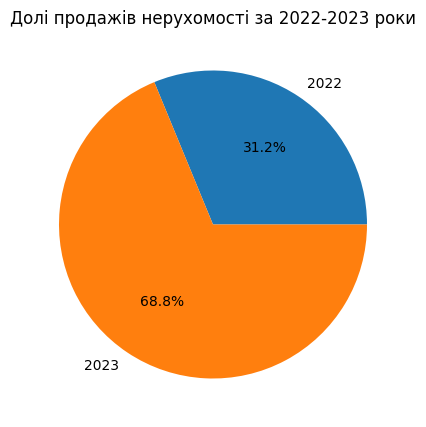

In [119]:
rollingsales_df_copy["sale_year"] = rollingsales_df_copy.sale_date.dt.year
sales_by_year = (
    rollingsales_df_copy[["sale_year", "sale_price"]]
    .groupby(["sale_year"], observed=True)
    .sum()
    .reset_index()
)

plt.figure(figsize=(5, 5))

plt.pie(
    x=sales_by_year["sale_price"],
    labels=sales_by_year["sale_year"],
    autopct="%1.1f%%",
)

plt.title("Частка продажів нерухомості за 2022-2023 роки");

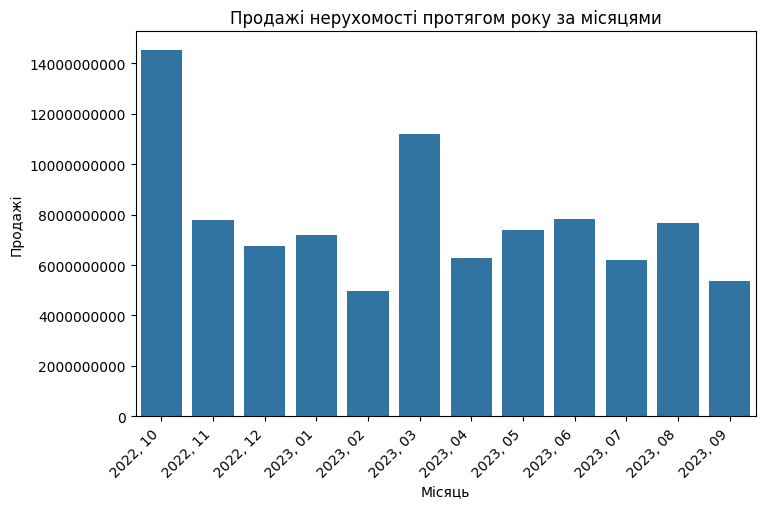

In [145]:
rollingsales_df_copy['sale_month'] = rollingsales_df_copy.sale_date.dt.strftime('%Y, %m')
sales_by_month = (
    rollingsales_df_copy[["sale_month", "sale_price"]]
    .groupby(["sale_month"], observed=True)
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 5))

sns.barplot(data=sales_by_month, x="sale_month", y="sale_price",)

plt.ticklabel_format(style='plain', axis='y')
plt.title("Продажі нерухомості протягом року за місяцями")
plt.xlabel("Місяць")
plt.ylabel("Продажі")
plt.xticks(rotation=45, ha='right');

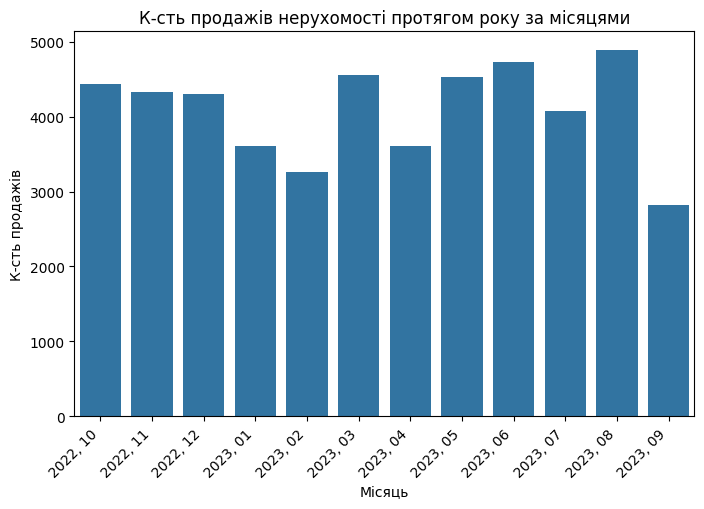

In [156]:
sales_by_month["sales_count"] = (
    rollingsales_df_copy[["sale_month", "sale_price"]]
    .groupby(["sale_month"], observed=True)
    .count()
    .reset_index()["sale_price"]
)

plt.figure(figsize=(8, 5))

sns.barplot(data=sales_by_month, x="sale_month", y="sales_count",)

plt.ticklabel_format(style='plain', axis='y')
plt.title("К-сть продажів нерухомості протягом року за місяцями")
plt.xlabel("Місяць")
plt.ylabel("К-сть продажів")
plt.xticks(rotation=45, ha="right");

Text(0.5, 1.0, 'Продажі нерухомості по районам')

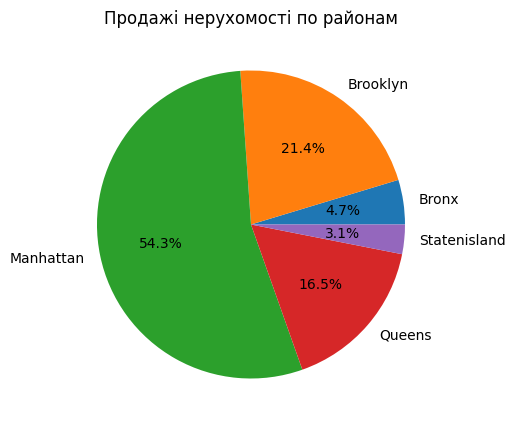

In [128]:
plt.figure(figsize=(8, 5))

plt.pie(
    data=(
        rollingsales_df_copy[["borough", "sale_price"]]
        .groupby(["borough"], observed=True)
        .sum()
        .reset_index()
    ),
    x="sale_price",
    labels="borough",
    autopct="%1.1f%%",
)

plt.title("Продажі нерухомості по районам");

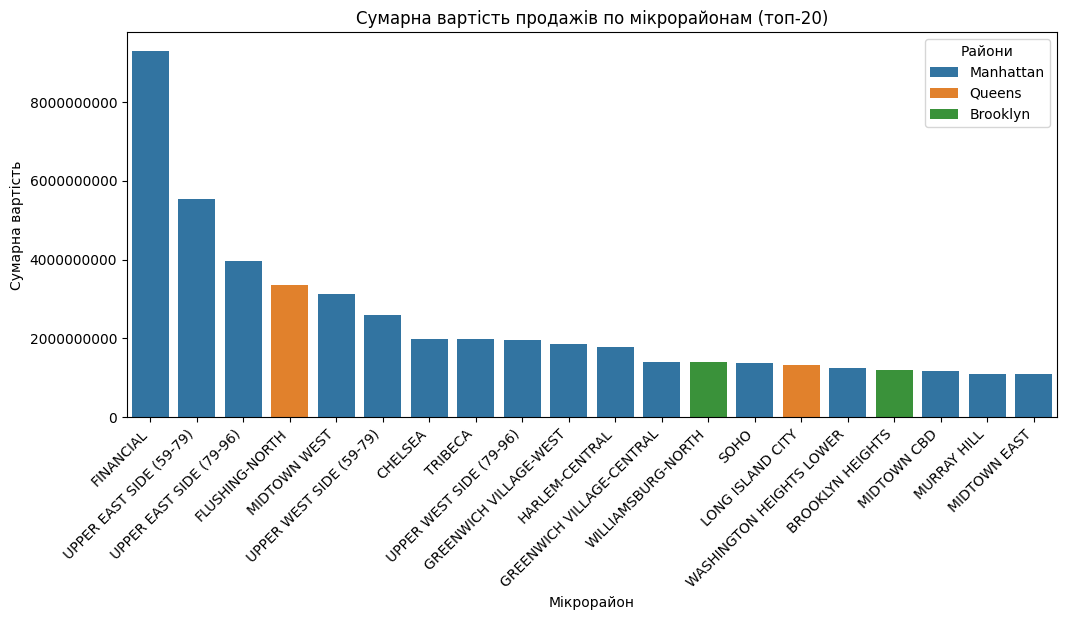

In [135]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=(
        rollingsales_df_copy[["neighborhood", "borough", "sale_price"]]
        .groupby(["borough", "neighborhood"], observed=True)
        .sum()
        .reset_index()
        .sort_values(by="sale_price", ascending=False)
        .head(20)
    ),
    x="neighborhood",
    y="sale_price",
    hue="borough",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Сумарні продажі по мікрорайонам (топ-20)")
plt.xlabel("Мікрорайон")
plt.ylabel("Сумарні продажі")
plt.legend(title="Райони")
plt.xticks(rotation=45, ha="right");

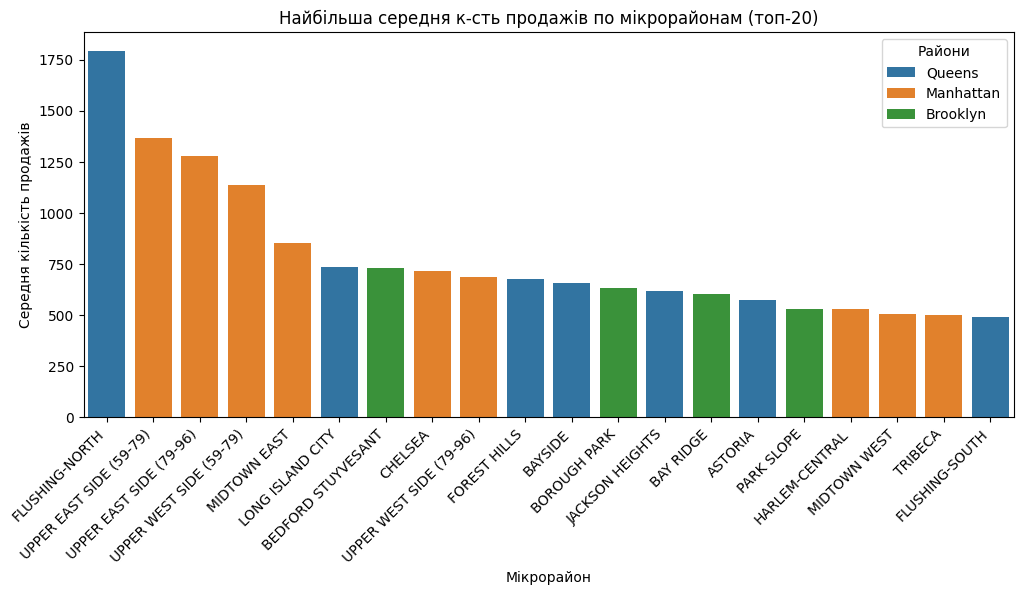

In [152]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=(
        rollingsales_df_copy[["neighborhood", "borough", "sale_price"]]
        .groupby(["borough", "neighborhood"], observed=True)
        .count()
        .reset_index()
        .sort_values(by="sale_price", ascending=False)
        .head(20)
    ),
    x="neighborhood",
    y="sale_price",
    hue="borough",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Найбільша середня к-сть продажів по мікрорайонам (топ-20)")
plt.xlabel("Мікрорайон")
plt.ylabel("Середня кількість продажів")
plt.legend(title='Райони')
plt.xticks(rotation=45, ha="right");

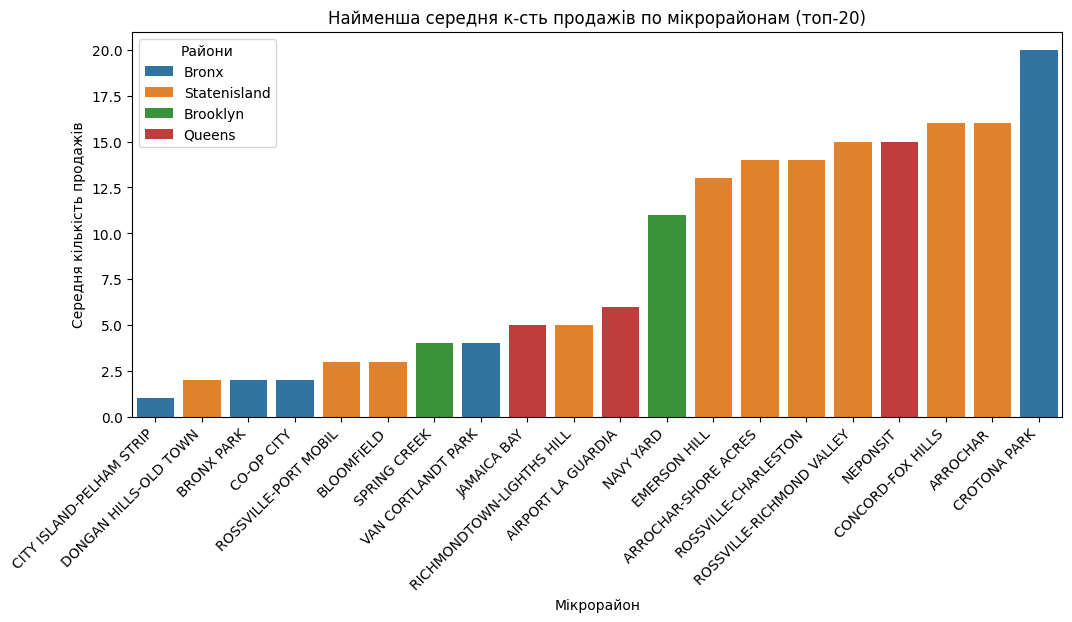

In [153]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=(
        rollingsales_df_copy[["neighborhood", "borough", "sale_price"]]
        .groupby(["borough", "neighborhood"], observed=True)
        .count()
        .reset_index()
        .sort_values(by="sale_price", ascending=True)
        .head(20)
    ),
    x="neighborhood",
    y="sale_price",
    hue="borough",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Найменша середня к-сть продажів по мікрорайонам (топ-20)")
plt.xlabel("Мікрорайон")
plt.ylabel("Середня кількість продажів")
plt.legend(title='Райони')
plt.xticks(rotation=45, ha="right");

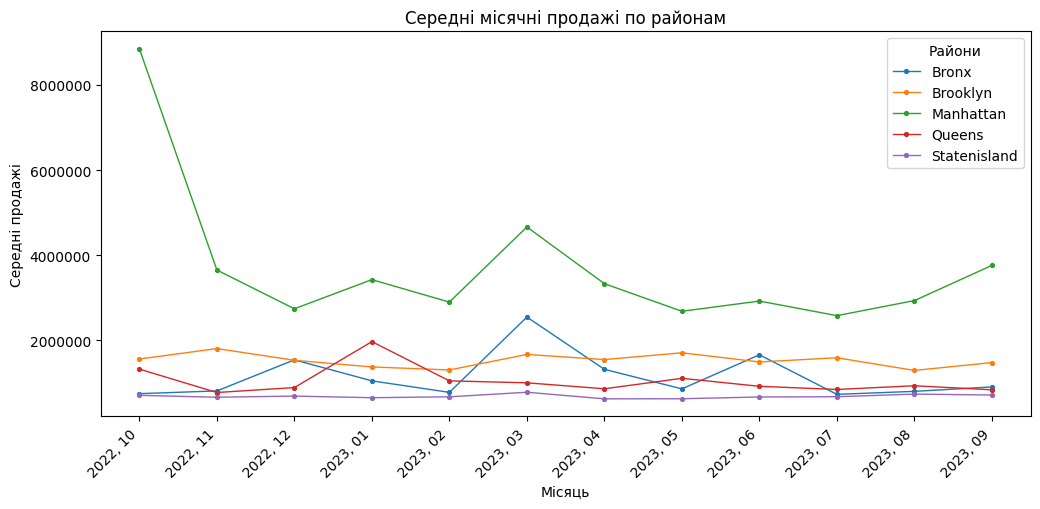

In [137]:
sales_by_borough = (
    rollingsales_df_copy[["borough", "sale_month", "sale_price"]]
    .groupby(["borough", "sale_month"], observed=True)
    .sum()
    .reset_index()
)
sales_by_borough.rename(columns={"sale_price": "sales_sum"}, inplace=True)

sales_by_borough["sale_mean"] = (
    rollingsales_df_copy[["borough", "sale_month", "sale_price"]]
    .groupby(["borough", "sale_month"], observed=True)
    .mean()
    .reset_index()["sale_price"]
)

plt.figure(figsize=(12, 5))

sns.pointplot(
    data=sales_by_borough,
    x="sale_month",
    y="sale_mean",
    hue="borough",
    markersize=3,
    linewidth=1,
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Середні місячні продажі по районам")
plt.xlabel("Місяць")
plt.ylabel("Середні продажі")
plt.legend(title='Райони')
plt.xticks(rotation=45, ha="right");

In [87]:
rollingsales_df_copy.year_built.unique()

array([1900., 1910., 1904., 1913., 1930., 1925., 1920., 1928., 1923.,
       1950., 1937., 1929., 1940., 1953., 1960., 1967., 1974., 1980.,
       1987., 1994., 2001., 2007., 2014., 1971., 2008., 2010., 2011.,
       2012., 2009., 2017., 2000., 1958., 1933., 1901., 1905., 1850.,
       1938., 1944., 2002., 1864., 1921., 1917., 1911., 2003., 1963.,
       1926., 1902., 1889., 1898., 1939., 1918., 1927., 1909., 2015.,
       2018., 2013., 2020., 2019., 2005., 2006., 1989., 1985., 1984.,
       1975., 1966., 1957., 1947., 1983., 1965., 1946., 1912., 1961.,
       2004., 1899., 1970., 1875., 1973., 1914., 1916., 1851., 1932.,
       1935., 1941., 1952., 1955., 1964., 1982., 1931., 1908., 1919.,
       1880., 2016., 1915., 1990., 2021., 1934., 1924., 1978., 1991.,
       1977., 1942., 1860., 1890., 1896., 1996., 1962., 1986., 1997.,
       1988., 1951., 1888., 1870., 1922., 1906., 1907., 1972., 1956.,
       1949., 1903., 1840., 1969., 1968., 1943., 1954., 1945., 1959.,
       1976., 1895.,

In [90]:
bins = [1624, 1800, 1850, 1900, 1950, 2000, float("inf")]
labels = ["<1800", "1800–1849", "1850–1899", "1900–1949", "1950–1999", "2000-2023"]

rollingsales_df_copy.drop(
    rollingsales_df_copy[rollingsales_df_copy["year_built"] < 1624].index,
    inplace=True,
)

rollingsales_df_copy["year_built_group"] = pd.cut(
    rollingsales_df_copy.year_built,
    bins=bins,
    labels=labels,
    right=False,
)
rollingsales_df_copy.sample(3)

,index,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,...,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_year,sale_month,year_built_group
46707,69138,Statenisland,LIVINGSTON,09 COOPS - WALKUP APARTMENTS,2,138,119,C6,"146 BARD AVE, 22B",no info,...,19947.0,7219.0,1947.0,2,C6,299000,2022-10-27,2022,"2022, 10",1900–1949
2520,3039,Manhattan,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,901,1144,R4,"250 EAST 21ST STREET, 9A",9A,...,2316.0,7210.0,2021.0,2,R4,4287150,2023-03-14,2023,"2023, 03",2000-2023
22355,30872,Brooklyn,CROWN HEIGHTS,12 CONDOS - WALKUP APARTMENTS,2,1254,1202,R2,"764 ST JOHNS PLACE, 2A",2A,...,3732.0,14457.0,1910.0,2,R2,495000,2023-05-31,2023,"2023, 05",1900–1949


In [96]:
rollingsales_df_copy.year_built_group.value_counts()

year_built_group
1900–1949    21802
1950–1999    16524
2000-2023     9788
1850–1899      966
1800–1849       46
<1800            0
Name: count, dtype: int64

Text(0.5, 1.0, 'Продажі нерухомості по року побудови')

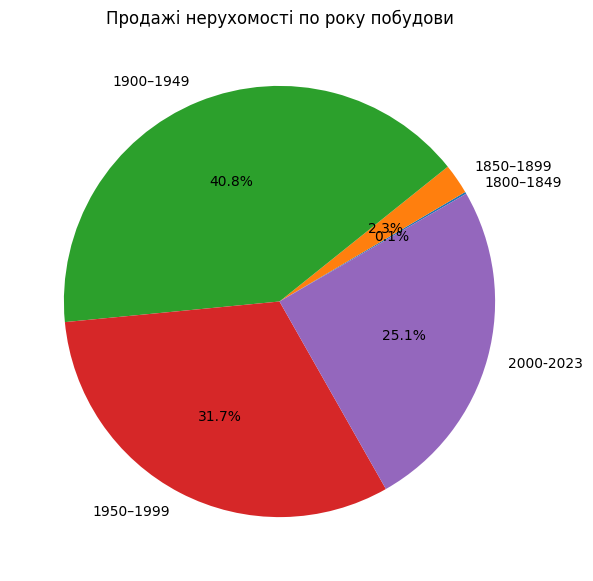

In [143]:
sales_by_year_built = (
    rollingsales_df_copy[["sale_price", "year_built_group"]]
    .groupby(["year_built_group"], observed=True)
    .sum()
    .reset_index()
)

plt.figure(figsize=(7, 7))

plt.pie(
    x=sales_by_year_built["sale_price"],
    labels=sales_by_year_built["year_built_group"],
    autopct="%1.1f%%",
    startangle=30,
)

plt.title("Продажі нерухомості по року побудови")

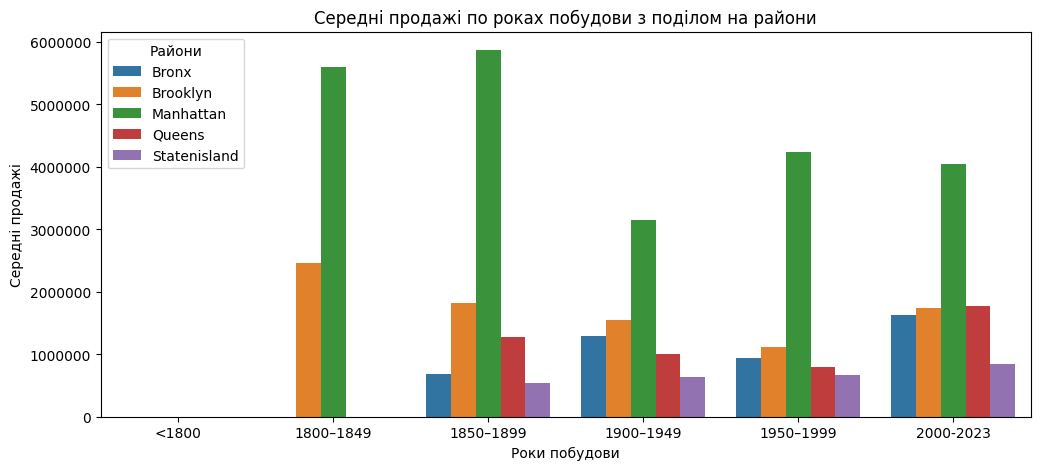

In [144]:
sales_by_year_built = (
    rollingsales_df_copy[["borough", "sale_price", "year_built_group"]]
    .groupby(["borough", "year_built_group",], observed=True, sort=True)
    .mean()
    .reset_index()
)
sales_by_year_built.rename(
    columns={"sale_price": "sales_mean", "year_built_group": "year_built"}, inplace=True
)

plt.figure(figsize=(12, 5))

sns.barplot(
    data=sales_by_year_built,
    x="year_built",
    y="sales_mean",
    hue="borough",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Середні продажі по роках побудови з поділом на райони")
plt.xlabel("Роки побудови")
plt.ylabel("Середні продажі")
plt.legend(title='Райони');

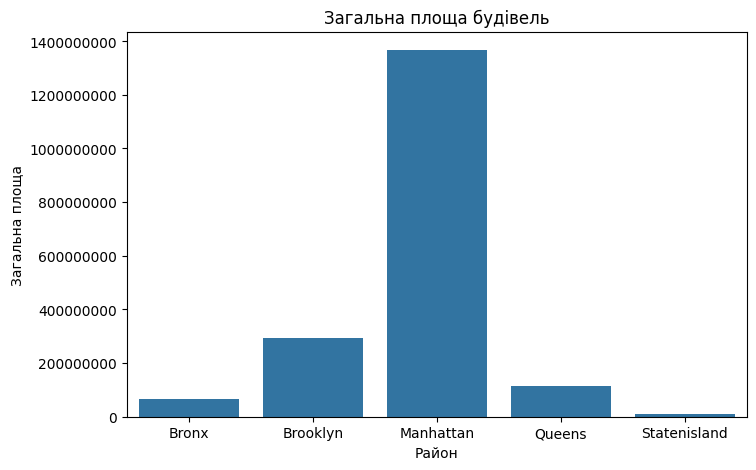

In [174]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=(
        rollingsales_df_copy[["borough", "sale_price", "gross_square_feet"]]
        .groupby(["borough"], observed=True, sort=True)
        .sum()
        .reset_index()
    ),
    x="borough",
    y="gross_square_feet",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Загальна площа будівель")
plt.xlabel("Район")
plt.ylabel("Загальна площа");

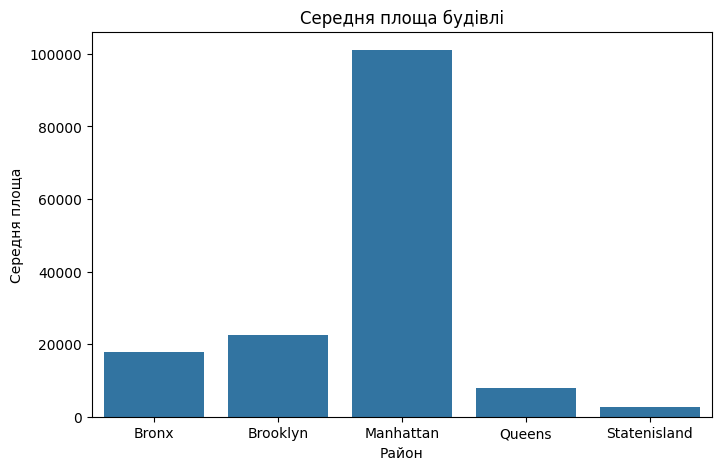

In [173]:
plt.figure(figsize=(8, 5))

sns.barplot(
    data=(
        rollingsales_df_copy[["borough", "sale_price", "gross_square_feet"]]
        .groupby(["borough"], observed=True, sort=True)
        .mean()
        .reset_index()
    ),
    x="borough",
    y="gross_square_feet",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Середня площа будівлі")
plt.xlabel("Район")
plt.ylabel("Середня площа");

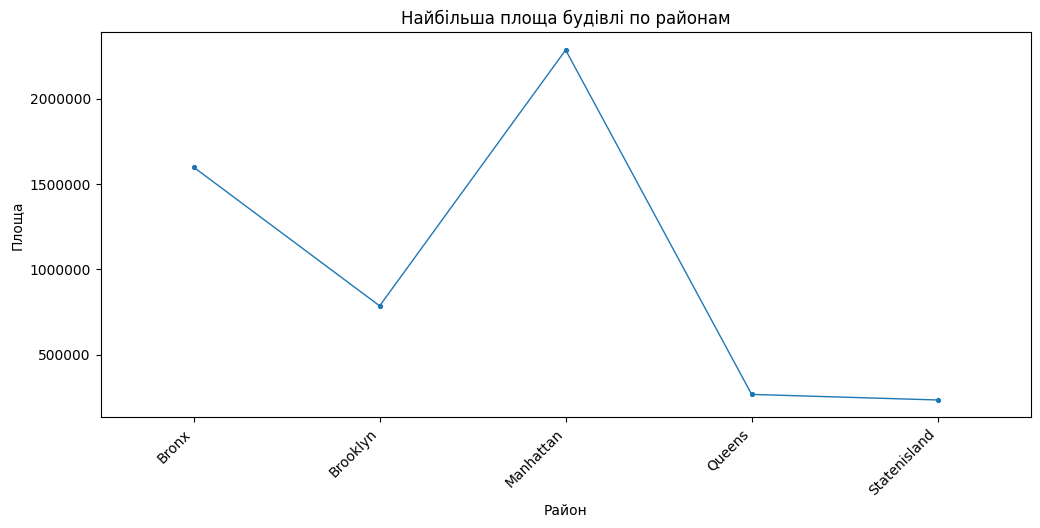

In [183]:
plt.figure(figsize=(12, 5))

sns.pointplot(
    data=(
        rollingsales_df_copy[["borough", "sale_price", "gross_square_feet"]]
        .groupby(["borough"], observed=True)
        .max()
        .reset_index()
    ),
    x="borough",
    y="gross_square_feet",
    markersize=3,
    linewidth=1,
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Найбільша площа будівлі по районам")
plt.xlabel("Район")
plt.ylabel("Площа")
plt.xticks(rotation=45, ha="right");

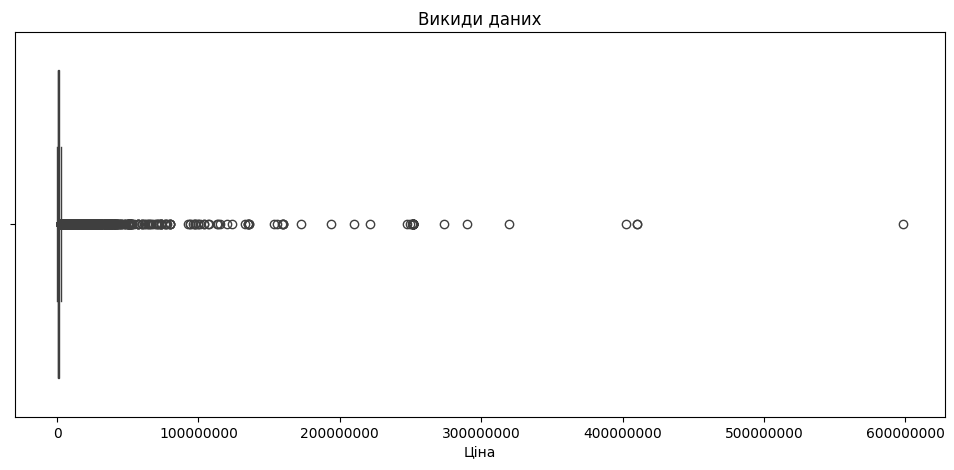

In [151]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=rollingsales_df_copy,
    x="sale_price",
)

plt.ticklabel_format(style="plain", axis="x")
plt.title("Викиди даних")
plt.xlabel("Ціна");

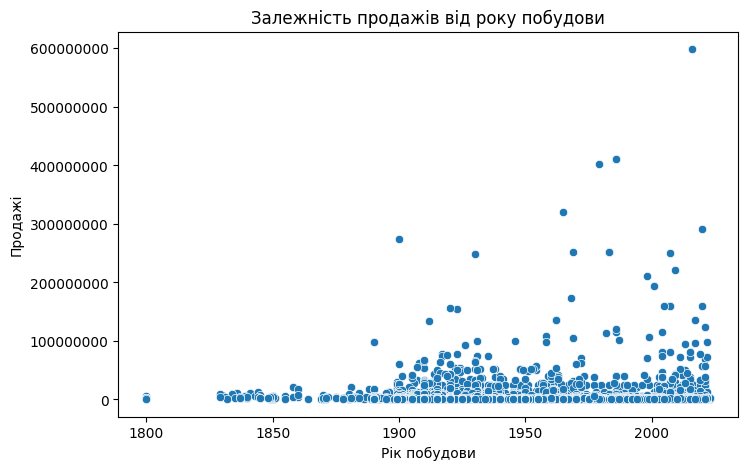

In [171]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=rollingsales_df_copy,
    y="sale_price",
    x="year_built",
)

plt.ticklabel_format(style="plain", axis="y")
plt.title("Залежність продажів від року побудови")
plt.ylabel("Продажі")
plt.xlabel("Рік побудови");